# Восстановление сильно зашумленного сигнала

Для восстановление сильно зашумленного сигнала (амплитуда шума превосходит амплитуду сигнала) можно применять метод усреднения. Для этого необходимо измерить сигнал многоканальной независимой системой. Таким образом шум будет улавливаться каждым каналом индивидуально, а благодаря случайности и среднему значению шума = 0 при усреднении будет восстановлен исходный сигнал.

Для начала импортируем нужные модули

In [1]:
from analysis import FT, examples
import grapher
import prng

r = prng.PRNG()
%matplotlib inline

Установим частоту дискретизации и количество семплов

In [2]:
deltaT = 0.001
N = 1000

Также установим свойства синусодиной функции и константу, насколько шум превышает сигнал. Частоту сигнала поставим равную 7 герцам.

In [3]:
f0 = 7      # частота
A0 = 100    # амплитуда
D = 10      # Превышение сигнала шумом

f = examples.sin(A0=A0, f0=f0, dt=deltaT)

Далее многократно повторяем эксперимент, получая многоканальную запись. После чего все каналы складываем и усредняем значения.

In [4]:
M = 32
values = [0] * N

for i in range(M):
	values = [values[t] + f(t) + r.uniform(-1, 1) * D * A0 for t in range(N)]

values = [values[t] / M for t in range(N)]


Построим полученный график и увидим, что сигнал успешно очищен от большй части помех. Для большего качества следует использовать большее число каналов для записи.

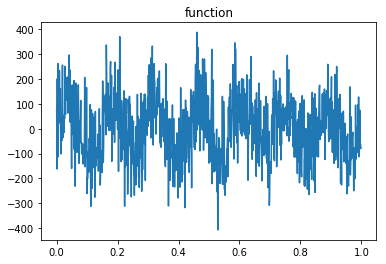

In [5]:
grapher.init(1)
grapher.set_subplot(1, x_arr=[i * deltaT for i in range(N)],
                    y_arr=values, title="function", subplot_y_number=1, subplot_x_number=1)
grapher.show()

Далее можем выполнить преобразование Фурье от полученных данных и убедится, что частота нашего сигнала совпадает с заданной.

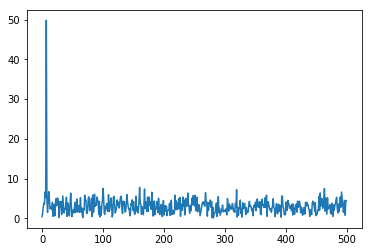

Частота с самой большой амплитудой: 7 Гц


In [6]:
ft_res = FT.fourier_transform(values, deltaT=deltaT)
values = ft_res.frequencies[:int(ft_res.borderF)]
grapher.init(1)
grapher.set_subplot(1, x_arr=[i * ft_res.deltaF for i in range(len(values))],
                    y_arr=values,
                    subplot_y_number=1, subplot_x_number=1)
grapher.show()
print("Частота с самой большой амплитудой: {} Гц".format(values.index(max(values))))